In [8]:
import numpy as np
import scipy.signal as sig
import scipy.fft as fft
import matplotlib.pyplot as plt

In [19]:
def plt_fft(u):
    ufft = fft.fftshift(fft.fft(u))
    ufft_abs =  ufft.real**2 + ufft.imag**2
    plt.plot(fft.fftshift(fft.fftfreq(len(u))), ufft_abs)

In [38]:
cutoff = 0.25    # Desired cutoff frequency
trans_width = 0.05  # Width of transition from pass band to stop band
numtaps = 50      # Size of the FIR filter.

taps = sig.remez(numtaps, [0, cutoff, cutoff + trans_width, 0.5], [1, 0], fs=1.0)

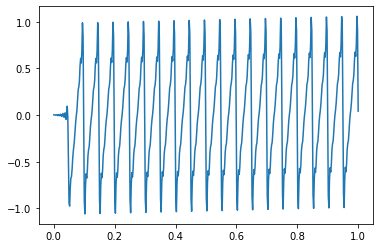

In [51]:
N = 500
t = np.linspace(0, 1, N)
u = sig.sawtooth(2 * np.pi * 20 * t)
u = sig.lfilter(taps, [1], u)
plt.plot(t,u)

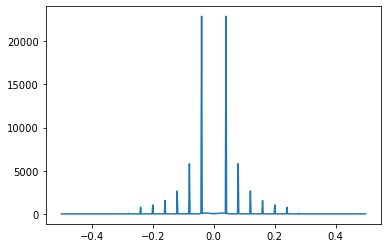

In [52]:
plt_fft(u)

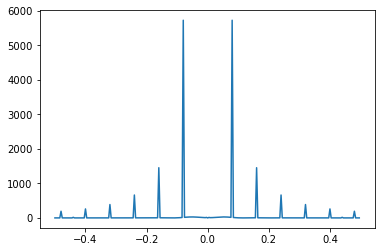

In [53]:
v = u[::2]
plt_fft(v)

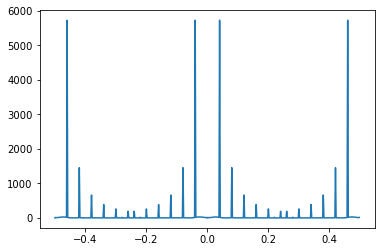

In [54]:
uhat = np.zeros(N)
uhat[::2] = v
# plt.plot(uhat)
# uhat
plt_fft(uhat)

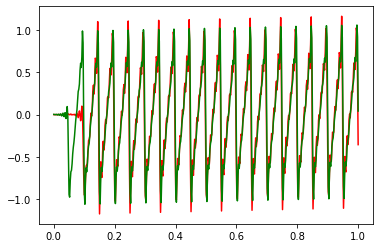

In [55]:
uhat_filter = 2*sig.lfilter(taps,[1],uhat)
plt.plot(t,uhat_filter,'r-', t,u,'-g')

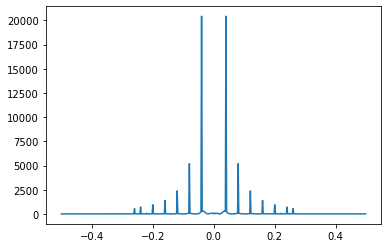

In [56]:
plt_fft(uhat_filter)

In [57]:
np.sum(np.abs(u - uhat_filter)**2) / np.sum(np.abs(u)**2)

0.14289147965035034